<a href="https://colab.research.google.com/github/RajeshworM/Yield_Modelling_Automation/blob/main/HY_and_PJ_Seperate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green'> <font size='6'> **Rice growing districts in Haryana**

Uploading panel data 


Saving data_hy.csv to data_hy (2).csv

Data prepared: (352, 230) years 2010 to 2025
Zone clusters available: [np.int64(6)]

Working on zone_cluster 6: train=286, val=22, forecast=44

=== STEP A: Economic Variable Selection (FE) relative to Inputs ===
 Econ econ_inc_rev1: coef=0.007107, p=0.0039
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.007614, p=0.0002
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.007753, p=0.0008, vs current p=0.0039
 -> kept econ_inc_rev2 in econ group
 Econ econ_inc_rev3: coef=0.002801, p=0.2148
 Econ econ_inc_rev4: coef=0.007831, p=0.0001
 Averaged ['econ_inc_rev1', 'econ_inc_rev2', 'econ_inc_rev4'] -> coef=0.008268, p=0.0003, vs current p=0.0008
 -> kept econ_inc_rev4 in econ group
 Econ econ_inc_rev5: coef=0.008618, p=0.0008
 Averaged ['econ_inc_rev1', 'econ_inc_rev2', 'econ_inc_rev4', 'econ_inc_rev5'] -> coef=0.008388, p=0.0004, vs current p=0.0003
 Econ econ_inc_rev6: coef=0.008991, p=0.0002
 Averaged ['econ_inc_rev1', 'econ_inc

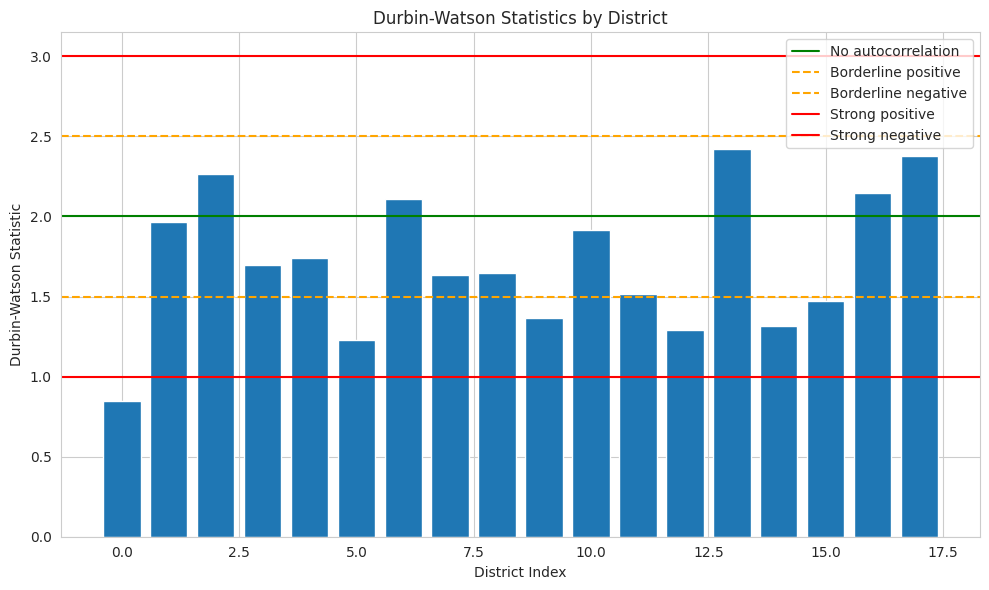


=== Fitting final FE model with Autocorrelation Correction ===
                          PanelOLS Estimation Summary                           
Dep. Variable:              yield_val   R-squared:                        0.5088
Estimator:                   PanelOLS   R-squared (Between):              0.3340
No. Observations:                 227   R-squared (Within):               0.5088
Date:                Thu, Oct 16 2025   R-squared (Overall):              0.3803
Time:                        07:08:54   Log-likelihood                   -1561.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.005
Entities:                          18   P-value                           0.0000
Avg Obs:                       12.611   Distribution:                  F(12,197)
Min Obs:                       6.0000                                           
Max Obs:                       13.000   F-sta

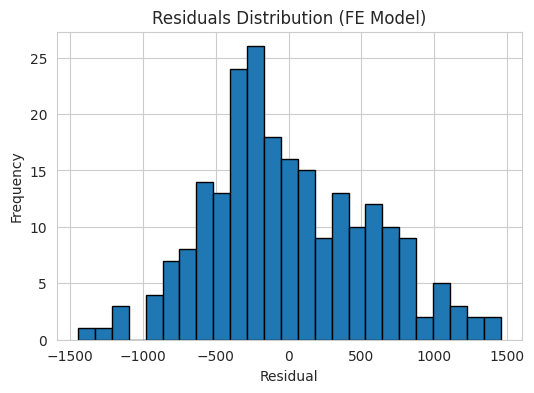

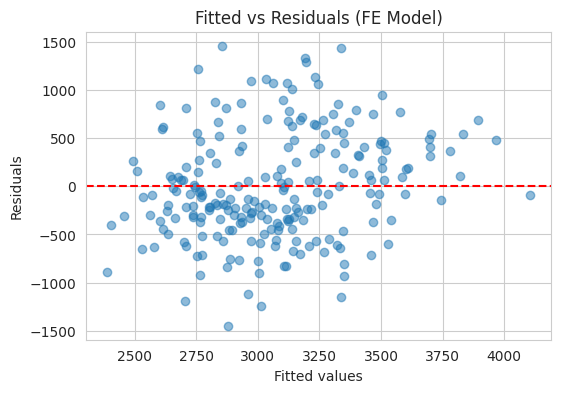

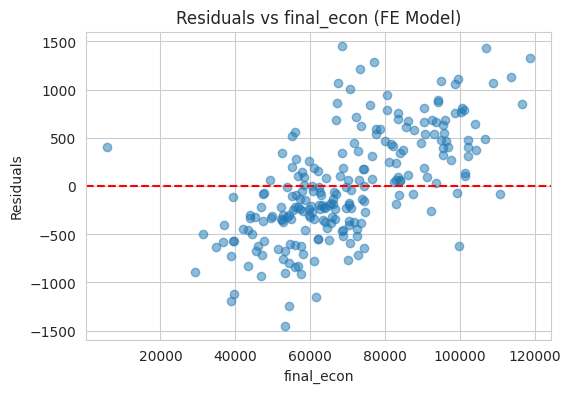

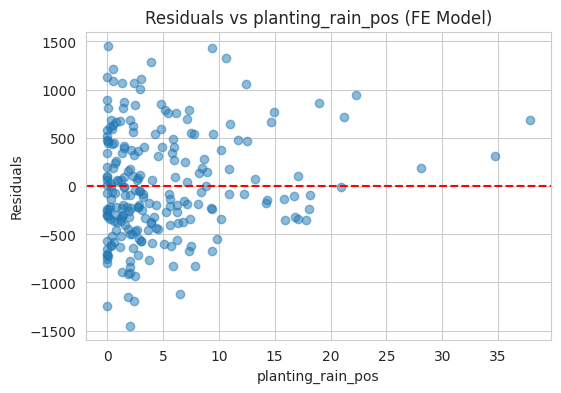

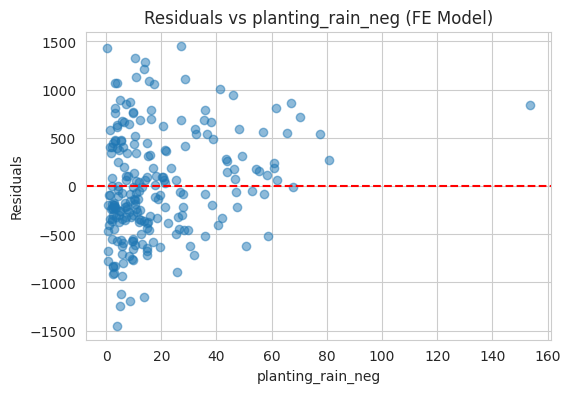


Shapiro-Wilk test: stat=0.9874, p=0.0428
Residuals deviate from normality

RMSE per district (sample period):
District 6: RMSE = 553.010
District 29: RMSE = 853.011
District 36: RMSE = 799.884
District 49: RMSE = 339.263
District 52: RMSE = 909.184
District 72: RMSE = 612.119
District 81: RMSE = 402.231
District 83: RMSE = 319.915
District 84: RMSE = 425.716
District 89: RMSE = 533.269
District 96: RMSE = 1036.321
District 123: RMSE = 230.761
District 124: RMSE = 361.850
District 125: RMSE = 209.033
District 138: RMSE = 588.295
District 160: RMSE = 304.809
District 163: RMSE = 302.989
District 172: RMSE = 383.980

Overall RMSE (sample period, used rows): 553.781
Saved sample-period predictions (FE model) to sample_predictions_FE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Step K: Regenerate features in val & forecast (auto) ===

=== Validation (2023) prediction (FE) ===


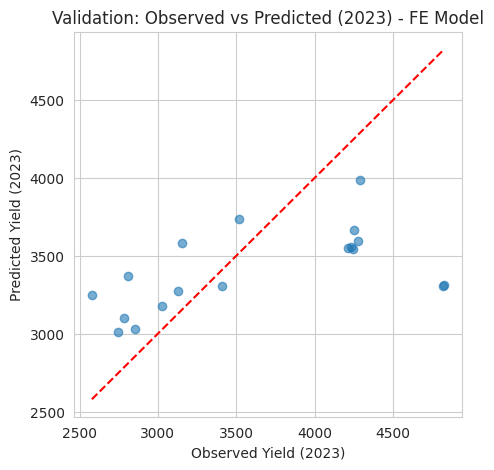

Validation RMSE (2023) - FE Model: 671.786
Saved validation predictions (FE model) to validation_predictions_FE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Forecast (2024-2025) prediction (FE) ===
Forecast predictions (FE model):
                  yield_predicted
district_id year                 
6           2024      3406.808152
            2025      3537.062435
29          2024      2696.344170
            2025      2873.007288
36          2024      2833.062173
            2025      2962.030927
49          2024      2625.625320
            2025      2816.796692
52          2024      2696.985459
            2025      3161.519076
65          2024      2481.530060
            2025      2605.296973
72          2024      2718.388928
            2025      3082.887197
81          2024      2524.120650
            2025      2872.495287
83          2024      3082.118490
            2025      3374.029562
84          2024      2969.063479
            2025      3292.417488
89          2024      2931.969775
            2025      3295.230691
96          2024      2984.443622
            2025      3405.303397
102         2024      2395.516827
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Fixed Effects Model Summary with Autocorrelation Correction ===
Model Type: Fixed Effects (FE)
Covariance Type: unknown
Final variables selected: 12
Variables: ['final_econ', 'planting_rain_pos', 'planting_rain_neg', 'ripening_rain_neg', 'vegetative_tmax_neg', 'ripening_tmax_neg', 'planting_tmin_neg', 'vegetative_tmin_pos', 'irrigation_pos', 'ripening_rain_pos_x_irrigation_pos', 'planting_rain_pos_x_reservoir_intensity1', 'ripening_rain_pos_x_reservoir_intensity1']
Training RMSE: 553.781
Validation RMSE (2023): 671.786

Autocorrelation Status:
- 33.3% districts show positive autocorrelation
- 0.0% districts show negative autocorrelation
- 66.7% districts show no autocorrelation

FE Model notes:
- District-level fixed effects included (entity_effects=True).
- Coefficients reflect within-district variation after removing entity means.
- Using 'unknown' standard errors to handle autocorrelation.

FE Pipeline with Autocorrelation Correction finished successfully!
Final variables used:

In [5]:
# Full Pipeline using FE model for Crop Yield Prediction
# Full Pipeline with Complete Autocorrelation Correction
# Fixed Effects (FE) with Durbin-Watson Autocorrelation Testing

!pip install linearmodels --quiet

# Imports required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# User Config -
ZONE_CLUSTER = 6       # change as needed based on Agri-climatic regions
P_SIGN = 0.15
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2010,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# Upload Data
from google.colab import files
print("Uploading panel data ")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# Standardize Columns
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2010) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(int)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# Variable groups (auto-detect)
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity1','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
soil_vars_all = [c for c in ['alluvial','black','sandy_oth'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought', 'rf_excess'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(15,45) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(15,45) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(15,45) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all + soil_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# Impute Missing Values (within-district ffill/bfill then median)
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 5 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 5].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# Cluster Subset
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# Enhanced Helper Functions with Autocorrelation Diagnostics
def fe_fit(y, X, data, cov_type="robust", check_autocorr=False):
    """Panel Fixed Effects fit with autocorrelation options."""
    try:
        panel = data.set_index(['district_id','year']).sort_index()
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = PanelOLS(panel[y], exog, entity_effects=True)

        # Handle different covariance types
        if cov_type == "robust":
            res = mod.fit(cov_type="robust")
        elif cov_type == "clustered":
            res = mod.fit(cov_type="clustered", cluster_entity=True)
        elif cov_type == "newey-west":
            # For Newey-West, we need to specify the bandwidth
            max_lags = min(4, len(data['year'].unique()) - 1)  # Conservative lag choice
            res = mod.fit(cov_type="kernel", kernel="newey-west", bandwidth=max_lags)
        else:
            res = mod.fit(cov_type=cov_type)

        # Autocorrelation diagnostics if requested
        if check_autocorr:
            autocorr_info = check_panel_autocorrelation(res, panel, X)
            return res, autocorr_info
        else:
            return res
    except Exception as e:
        print(f"FE fit error: {e}")
        return None

def check_panel_autocorrelation(model_result, panel_data, X_vars):
    """Comprehensive autocorrelation checking for panel data"""
    autocorr_info = {}

    try:
        # Get residuals
        residuals = model_result.resids

        # Convert to DataFrame for easier manipulation
        resid_df = residuals.reset_index()
        resid_df.columns = ['district_id', 'year', 'residual']

        # Durbin-Watson test by district
        dw_stats = []
        for district in resid_df['district_id'].unique():
            district_resid = resid_df[resid_df['district_id'] == district].sort_values('year')
            if len(district_resid) > 1:
                dw_stat = durbin_watson(district_resid['residual'])
                dw_stats.append({'district_id': district, 'dw_stat': dw_stat})

        if dw_stats:
            dw_df = pd.DataFrame(dw_stats)
            autocorr_info['durbin_watson_stats'] = dw_df
            autocorr_info['dw_mean'] = dw_df['dw_stat'].mean()
            autocorr_info['dw_median'] = dw_df['dw_stat'].median()
            autocorr_info['dw_std'] = dw_df['dw_stat'].std()

            # Interpretation
            n_districts = len(dw_df)
            positive_autocorr = len(dw_df[dw_df['dw_stat'] < 1.5])
            negative_autocorr = len(dw_df[dw_df['dw_stat'] > 2.5])
            no_autocorr = len(dw_df[(dw_df['dw_stat'] >= 1.5) & (dw_df['dw_stat'] <= 2.5)])

            autocorr_info['autocorr_summary'] = {
                'total_districts': n_districts,
                'positive_autocorr': positive_autocorr,
                'negative_autocorr': negative_autocorr,
                'no_autocorr': no_autocorr,
                'positive_autocorr_pct': positive_autocorr / n_districts * 100,
                'negative_autocorr_pct': negative_autocorr / n_districts * 100,
                'no_autocorr_pct': no_autocorr / n_districts * 100
            }

    except Exception as e:
        print(f"Autocorrelation check error: {e}")
        autocorr_info['error'] = str(e)

    return autocorr_info

def select_best_covariance_type(y, X, data, max_lags=3):
    """Test different covariance types and select the most appropriate one based on autocorrelation"""
    covariance_types = ["robust", "clustered", "newey-west"]
    results = {}

    for cov_type in covariance_types:
        try:
            res, autocorr_info = fe_fit(y, X, data, cov_type=cov_type, check_autocorr=True)
            if res is not None:
                results[cov_type] = {
                    'model': res,
                    'autocorr_info': autocorr_info,
                    'aic': getattr(res, 'aic', np.nan),
                    'bic': getattr(res, 'bic', np.nan),
                    'rsquared': getattr(res, 'rsquared', np.nan)
                }
        except Exception as e:
            print(f"Error with {cov_type}: {e}")
            continue

    # Select best model based on autocorrelation and fit criteria
    if not results:
        return None, None

    # Prefer Newey-West if significant autocorrelation exists
    autocorr_present = False
    for cov_type, result in results.items():
        autocorr_summary = result['autocorr_info'].get('autocorr_summary', {})
        if autocorr_summary.get('positive_autocorr_pct', 0) > 50:  # More than 50% districts have positive autocorr
            autocorr_present = True
            break

    if autocorr_present and 'newey-west' in results:
        print("Significant autocorrelation detected - using Newey-West standard errors")
        return results['newey-west']['model'], results['newey-west']['autocorr_info']
    elif 'clustered' in results:
        print("Using clustered standard errors")
        return results['clustered']['model'], results['clustered']['autocorr_info']
    else:
        print("Using robust standard errors")
        return next(iter(results.values()))['model'], next(iter(results.values()))['autocorr_info']

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# Structures to record feature_map & groups
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# Step A: Economic variable relative to Inputs price
print("\n=== STEP A: Economic Variable Selection (FE) relative to Inputs ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = fe_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = fe_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = fe_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# Step B: Ground Water & Reservoir
print("\n=== Step B: GW reciprocal & Reservoir (FE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity1']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = fe_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# Step C: Rainfall Weekly Selection based on significance level
print("\n=== STEP C: Rainfall Weekly Selection (FE) ===")
stage_weeks = {
    'planting': list(range(15,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,45))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = fe_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = fe_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = fe_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = fe_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = fe_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = fe_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = fe_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# STEP D: Temperature Weekly based on significance level
print("\n=== Step D: Temperature Weekly (FE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(15,45) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = fe_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = fe_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = fe_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = fe_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = fe_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# Step E: Irrigation
print("\n=== Step E: Irrigation (FE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = fe_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# Step F: Stress Variables
print("\n=== Step F: Stress Variables (FE) ===")
for s in ['heat_stress','drought','rf_excess']:
    if s in train.columns:
        res = fe_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# Step G: Soil share
print("\n=== STEP G: Soil Share Variables (FE) ===")
for s in ['black', 'alluvial','sandy_other']:
    if s in train.columns:
        res = fe_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after Soil vars:", base_features)

# Step H: Interactions
print("\n=== Step H: Interaction testing (FE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity1' if 'reservoir_intensity1' in train.columns else None
soil_col = 'sandy_other' if 'sandy_other' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if soil_col:
    for r in rain_cols:
        interaction_candidates.append((r, soil_col))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# Step I: Quadratic Rain (ONLY for original rain variables, not interactions)
print("\n=== Step I: Quadratic rain terms (FE) ===")
quad_kept = []

# CORRECTED: Only use original rain variables from Step C, exclude interactions
# Get the original rain variables from feature_map (those created in Step C)
original_rain_cols = []
for feat, rule in feature_map.items():
    if isinstance(rule, list) and any('rf_week' in str(col) for col in rule):
        # This is an original rain variable from Step C
        original_rain_cols.append(feat)

# Alternative approach: use the rain_groups dictionary to get original rain variables
original_rain_cols_alt = []
for stage in stage_weeks.keys():
    pos_name = f"{stage}_rain_pos"
    neg_name = f"{stage}_rain_neg"
    if pos_name in current_vars:
        original_rain_cols_alt.append(pos_name)
    if neg_name in current_vars:
        original_rain_cols_alt.append(neg_name)

# Use the alternative approach as it's more direct
rain_cols = [col for col in original_rain_cols_alt if col in train.columns]

print(f"Creating quadratic terms for {len(rain_cols)} original rain variables:")
print(rain_cols)

for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

P_SIGN = 0.05

# Step J: VIF & p-value pruning with Autocorrelation Consideration
print("\n=== Step J: VIF & p-value pruning with Autocorrelation Check ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Use autocorrelation-aware model selection for p-value checking
    if final_vars:
        res_tmp, autocorr_info = select_best_covariance_type('yield_val', final_vars, train)
        if res_tmp is None:
            break

        pvals = res_tmp.pvalues.drop('const', errors='ignore')
        if (pvals >= P_SIGN).any():
            drop_var = pvals.idxmax()
            print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
            if drop_var in final_vars:
                final_vars.remove(drop_var)
            train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
            feature_map.pop(drop_var, None)

            # Print autocorrelation diagnostics
            if autocorr_info and 'autocorr_summary' in autocorr_info:
                summary = autocorr_info['autocorr_summary']
                print(f" Autocorrelation status: {summary['positive_autocorr_pct']:.1f}% districts have positive autocorr")
            continue
        else:
            print("All VIFs and p-values OK")
            # Store the selected model and autocorrelation info
            final_model = res_tmp
            final_autocorr_info = autocorr_info
            break
    else:
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# Comprehensive Autocorrelation Diagnostics
print("\n=== AUTOCORRELATION DIAGNOSTICS ===")
if 'final_autocorr_info' in locals():
    autocorr_info = final_autocorr_info
    if 'autocorr_summary' in autocorr_info:
        summary = autocorr_info['autocorr_summary']
        print(f"Durbin-Watson Statistics Summary:")
        print(f"  Mean DW: {autocorr_info.get('dw_mean', 'NA'):.3f}")
        print(f"  Median DW: {autocorr_info.get('dw_median', 'NA'):.3f}")
        print(f"  Districts with positive autocorrelation: {summary['positive_autocorr']} ({summary['positive_autocorr_pct']:.1f}%)")
        print(f"  Districts with negative autocorrelation: {summary['negative_autocorr']} ({summary['negative_autocorr_pct']:.1f}%)")
        print(f"  Districts with no autocorrelation: {summary['no_autocorr']} ({summary['no_autocorr_pct']:.1f}%)")

        # Interpretation
        if summary['positive_autocorr_pct'] > 50:
            print("  ⚠️  STRONG POSITIVE AUTOCORRELATION DETECTED")
            print("  Recommendation: Use Newey-West or include lagged terms")
        elif summary['positive_autocorr_pct'] > 30:
            print("  ⚠️  MODERATE POSITIVE AUTOCORRELATION DETECTED")
            print("  Recommendation: Consider clustered standard errors")
        else:
            print("  ✓ No significant autocorrelation concerns")

    # Plot Durbin-Watson statistics by district
    if 'durbin_watson_stats' in autocorr_info:
        plt.figure(figsize=(10, 6))
        dw_stats = autocorr_info['durbin_watson_stats']
        plt.bar(range(len(dw_stats)), dw_stats['dw_stat'])
        plt.axhline(y=2.0, color='green', linestyle='-', label='No autocorrelation')
        plt.axhline(y=1.5, color='orange', linestyle='--', label='Borderline positive')
        plt.axhline(y=2.5, color='orange', linestyle='--', label='Borderline negative')
        plt.axhline(y=1.0, color='red', linestyle='-', label='Strong positive')
        plt.axhline(y=3.0, color='red', linestyle='-', label='Strong negative')
        plt.xlabel('District Index')
        plt.ylabel('Durbin-Watson Statistic')
        plt.title('Durbin-Watson Statistics by District')
        plt.legend()
        plt.tight_layout()
        plt.show()


# Final FE Model with Autocorrelation Correction
print("\n=== Fitting final FE model with Autocorrelation Correction ===")
train_panel = train.set_index(['district_id','year']).sort_index()
final_vars = [v for v in final_vars if v in train_panel.columns]

# Use the best covariance type based on autocorrelation
if 'final_model' not in locals():
    final_model, final_autocorr_info = select_best_covariance_type('yield_val', final_vars, train)

if final_model is not None:
    print(final_model.summary)

    # Print which covariance type was used
    cov_type_used = getattr(final_model, 'cov_type', 'unknown')
    print(f"\nFinal model uses '{cov_type_used}' covariance estimator")

    # SAFE Residual Diagnostics & RMSE
    # Build X_full and y_full then determine used rows (no-NaN)
    X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_full = train_panel['yield_val']
    used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
    used_index = X_full.index[used_mask]

    if len(used_index) == 0:
        raise ValueError("No usable rows for diagnostics after filtering missing values.")

    # Fitted using params (only for used_index)
    fitted_used = pd.Series(X_full.loc[used_index].dot(final_model.params), index=used_index, name='fitted')

    # Create fitted aligned to full train_panel index (NaNs where not available)
    fitted = fitted_used.reindex(train_panel.index)

    # Residuals (NaN where fitted missing)
    residuals = y_full - fitted

    print("\nResidual summary statistics (used rows only):")
    print(residuals.dropna().describe())

    # Plots (drop NaNs where appropriate)
    plt.figure(figsize=(6,4))
    plt.hist(residuals.dropna(), bins=25, edgecolor='k')
    plt.title("Residuals Distribution (FE Model)")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Fitted vs Residuals (FE Model)")
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.show()

    for var in final_vars[:3]:  # Plot first 3 variables to avoid too many plots
        if var in X_full.columns:
            plt.figure(figsize=(6,4))
            # align predictor to same index subset
            plt.scatter(X_full[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
            plt.axhline(0, color='red', linestyle='--')
            plt.title(f"Residuals vs {var} (FE Model)")
            plt.xlabel(var)
            plt.ylabel("Residuals")
            plt.show()

    # Shapiro-Wilk
    resid_nonan = residuals.dropna()
    if len(resid_nonan) >= 3:
        stat, p_sw = shapiro(resid_nonan)
        print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
        print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
    else:
        print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

    # RMSE per district (safe drop NaNs)
    rmse_dict = {}
    for d in train_panel.index.get_level_values('district_id').unique():
        y_true = y_full.xs(d, level='district_id')
        y_pred = fitted.xs(d, level='district_id')
        df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
        if not df_tmp.empty:
            rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

    print("\nRMSE per district (sample period):")
    for d, r in rmse_dict.items():
        print(f"District {d}: RMSE = {r:.3f}")

    # Overall RMSE (drop NaNs)
    df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
    overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
    print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

    # Save sample-period actual vs predicted
    df_out = pd.DataFrame({
        'district_id': train_panel.reset_index()['district_id'],
        'year': train_panel.reset_index()['year'],
        'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
        'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
        'yield_actual': y_full.values,
        'yield_predicted': fitted.values
    })

    out_file = "sample_predictions_FE.csv"
    df_out.to_csv(out_file, index=False)
    print(f"Saved sample-period predictions (FE model) to {out_file}")
    try:
        files.download(out_file)
    except Exception:
        pass

else:
    print("Failed to fit final model")

# Feature Regeneration Utility
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# Step K: Regenerate features in val & forecast
print("\n=== Step K: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (FE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in final_model.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[final_model.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(final_model.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment.")
    else:
        plt.figure(figsize=(5,5))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - FE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - FE Model: {val_rmse:.3f}")

# Save validation (2023) actual vs predicted
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(final_model.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_FE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (FE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# Forecast (2024-2025) prediction
print("\n=== Forecast (2024-2025) prediction (FE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in final_model.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[final_model.params.index]
    y_fore_pred = pd.Series(X_fore.dot(final_model.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (FE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# Save forecast (2024–2025)
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(final_model.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_FE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (FE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# Model Comparison Summary
print("\n=== Fixed Effects Model Summary with Autocorrelation Correction ===")
print(f"Model Type: Fixed Effects (FE)")
print(f"Covariance Type: {getattr(final_model, 'cov_type', 'unknown')}")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

print("\nAutocorrelation Status:")
if 'final_autocorr_info' in locals() and 'autocorr_summary' in final_autocorr_info:
    summary = final_autocorr_info['autocorr_summary']
    print(f"- {summary['positive_autocorr_pct']:.1f}% districts show positive autocorrelation")
    print(f"- {summary['negative_autocorr_pct']:.1f}% districts show negative autocorrelation")
    print(f"- {summary['no_autocorr_pct']:.1f}% districts show no autocorrelation")

print("\nFE Model notes:")
print("- District-level fixed effects included (entity_effects=True).")
print("- Coefficients reflect within-district variation after removing entity means.")
print(f"- Using '{getattr(final_model, 'cov_type', 'unknown')}' standard errors to handle autocorrelation.")

# Pipeline Accomplished
print("\nFE Pipeline with Autocorrelation Correction finished successfully!")
print("Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:20])
print("\nOutput files generated:")
print("- sample_predictions_FE.csv")
print("- validation_predictions_FE.csv")
print("- forecast_predictions_FE.csv")

<font color='green'> <font size='6'> **Rice growing districts in Punjab**

Uploading panel data 


Saving data_pj.csv to data_pj.csv

Data prepared: (368, 230) years 2010 to 2025
Zone clusters available: [np.int64(6)]

Working on zone_cluster 6: train=299, val=23, forecast=46

=== STEP A: Economic Variable Selection (FE) relative to Inputs ===
 Econ econ_inc_rev1: coef=0.002227, p=0.1021
 -> selected first econ econ_inc_rev1
 Econ econ_inc_rev2: coef=0.005507, p=0.0001
 Averaged ['econ_inc_rev1', 'econ_inc_rev2'] -> coef=0.004063, p=0.0029, vs current p=0.1021
 -> kept econ_inc_rev2 in econ group
 Econ econ_inc_rev3: coef=-0.000573, p=0.6438
 Econ econ_inc_rev4: coef=0.003655, p=0.0002
 Averaged ['econ_inc_rev1', 'econ_inc_rev2', 'econ_inc_rev4'] -> coef=0.004164, p=0.0007, vs current p=0.0029
 -> kept econ_inc_rev4 in econ group
 Econ econ_inc_rev5: coef=0.003071, p=0.0249
 Averaged ['econ_inc_rev1', 'econ_inc_rev2', 'econ_inc_rev4', 'econ_inc_rev5'] -> coef=0.003946, p=0.0018, vs current p=0.0007
 Econ econ_inc_rev6: coef=0.004389, p=0.0004
 Averaged ['econ_inc_rev1', 'econ_inc_re

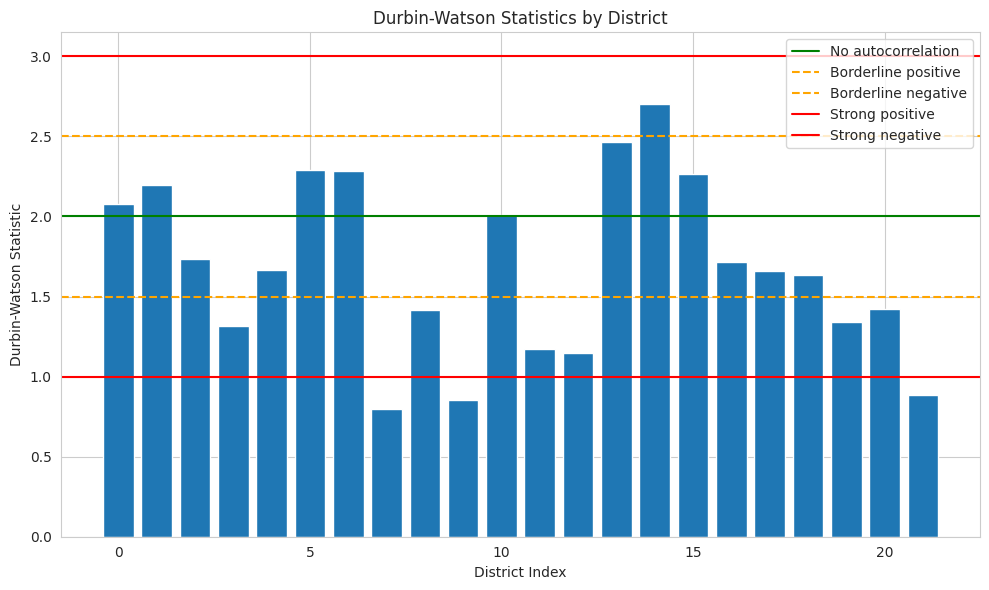


=== Fitting final FE model with Autocorrelation Correction ===
                          PanelOLS Estimation Summary                           
Dep. Variable:              yield_val   R-squared:                        0.3905
Estimator:                   PanelOLS   R-squared (Between):              0.3752
No. Observations:                 283   R-squared (Within):               0.3905
Date:                Thu, Oct 16 2025   R-squared (Overall):              0.3775
Time:                        07:12:25   Log-likelihood                   -1955.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.262
Entities:                          22   P-value                           0.0000
Avg Obs:                       12.864   Distribution:                   F(8,253)
Min Obs:                       11.000                                           
Max Obs:                       13.000   F-sta

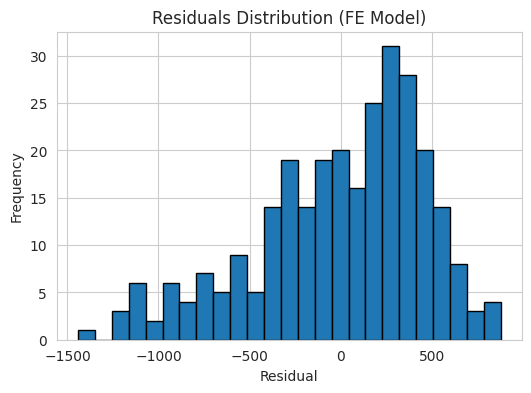

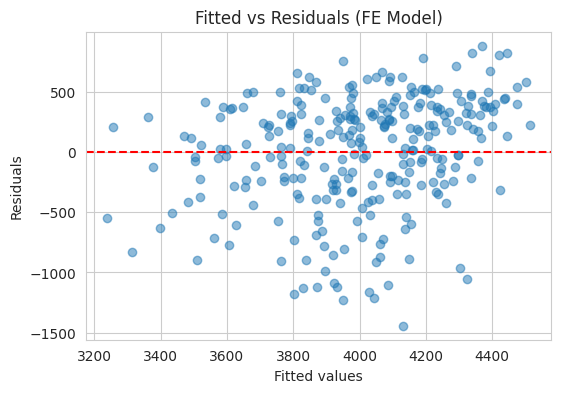

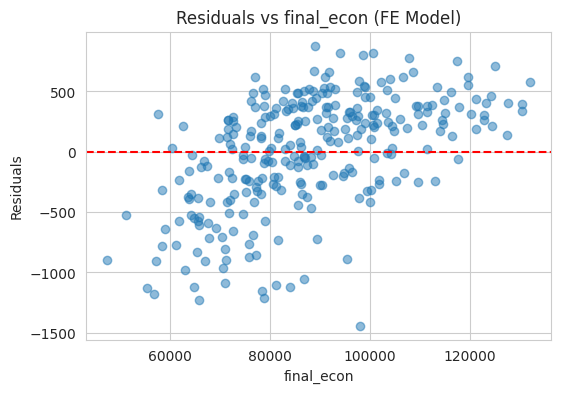

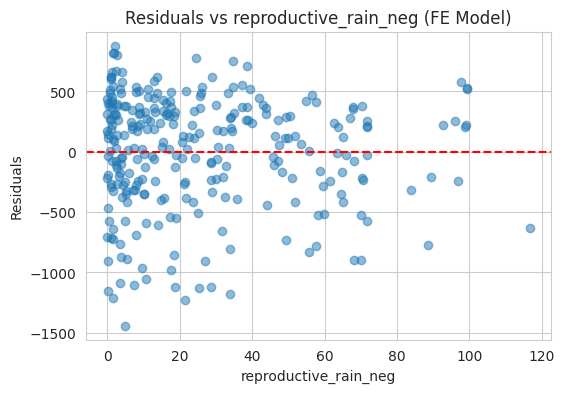

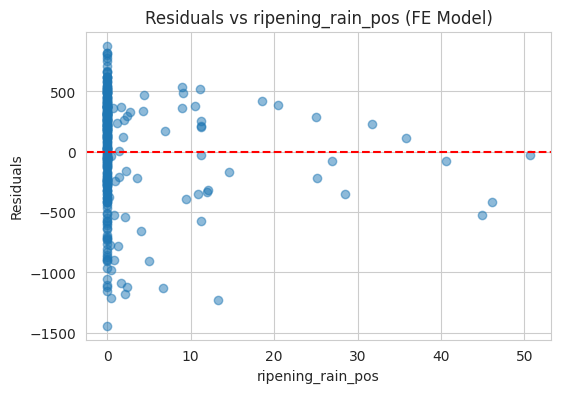


Shapiro-Wilk test: stat=0.9525, p=0.0000
Residuals deviate from normality

RMSE per district (sample period):
District 9: RMSE = 849.889
District 23: RMSE = 570.744
District 26: RMSE = 296.663
District 50: RMSE = 203.093
District 53: RMSE = 447.979
District 55: RMSE = 743.291
District 57: RMSE = 468.498
District 64: RMSE = 564.225
District 74: RMSE = 364.531
District 77: RMSE = 153.303
District 88: RMSE = 230.410
District 100: RMSE = 420.952
District 108: RMSE = 316.489
District 113: RMSE = 429.604
District 116: RMSE = 250.648
District 119: RMSE = 370.730
District 127: RMSE = 740.964
District 128: RMSE = 279.248
District 139: RMSE = 341.901
District 142: RMSE = 298.130
District 144: RMSE = 544.366
District 165: RMSE = 606.809

Overall RMSE (sample period, used rows): 465.163
Saved sample-period predictions (FE model) to sample_predictions_FE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Step K: Regenerate features in val & forecast (auto) ===

=== Validation (2023) prediction (FE) ===


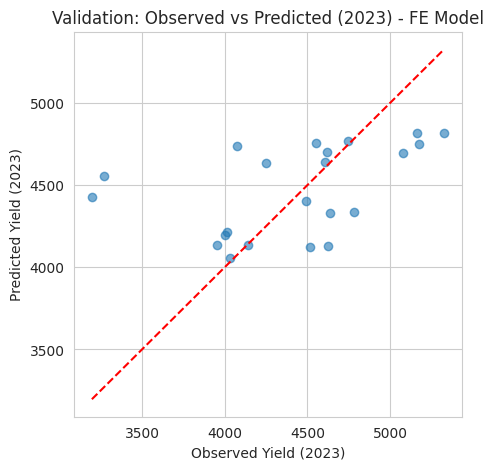

Validation RMSE (2023) - FE Model: 492.279
Saved validation predictions (FE model) to validation_predictions_FE.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Forecast (2024-2025) prediction (FE) ===
Forecast predictions (FE model):
                  yield_predicted
district_id year                 
9           2024      4069.905964
            2025      4010.932518
23          2024      4736.677274
            2025      4553.582320
26          2024      4628.151035
            2025      4808.394589
50          2024      4572.982118
            2025      4758.009080
53          2024      4288.847215
            2025      4430.532816
55          2024      4148.208438
            2025      4340.326427
57          2024      4563.311699
            2025      4720.347502
64          2024      4230.706139
            2025      3966.551274
74          2024      4209.488402
            2025      4274.279350
77          2024      4375.459380
            2025      4180.100521
88          2024      4359.725870
            2025      4522.083294
100         2024      4560.706732
            2025      4553.110947
105         2024      3713.582214
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Fixed Effects Model Summary with Autocorrelation Correction ===
Model Type: Fixed Effects (FE)
Covariance Type: unknown
Final variables selected: 8
Variables: ['final_econ', 'reproductive_rain_neg', 'ripening_rain_pos', 'ripening_rain_neg', 'vegetative_tmax_pos', 'reproductive_tmax_pos', 'reproductive_tmax_neg', 'planting_tmin_pos']
Training RMSE: 465.163
Validation RMSE (2023): 492.279

Autocorrelation Status:
- 40.9% districts show positive autocorrelation
- 4.5% districts show negative autocorrelation
- 54.5% districts show no autocorrelation

FE Model notes:
- District-level fixed effects included (entity_effects=True).
- Coefficients reflect within-district variation after removing entity means.
- Using 'unknown' standard errors to handle autocorrelation.

FE Pipeline with Autocorrelation Correction finished successfully!
Final variables used: ['final_econ', 'reproductive_rain_neg', 'ripening_rain_pos', 'ripening_rain_neg', 'vegetative_tmax_pos', 'reproductive_tmax_pos', 'rep

In [6]:
# Full Pipeline with Complete Autocorrelation Correction
# Fixed Effects (FE) with Durbin-Watson Autocorrelation Testing

!pip install linearmodels --quiet

# Imports required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# User Config -
ZONE_CLUSTER = 6       # change as needed based on Agri-climatic regions
P_SIGN = 0.15
VIF_THRESH = 10.0
TRAIN_YEARS = list(range(2010,2023))
VAL_YEAR = 2023
FORECAST_YEARS = [2024, 2025]

# Upload Data
from google.colab import files
print("Uploading panel data ")
uploaded = files.upload()
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)

# Standardize Columns
required_cols = ['district_id','year','zone_cluster','yield_val']
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df[(df['year'] >= 2010) & (df['year'] <= 2025)].copy()
df['district_id'] = df['district_id'].astype(int)
df['year'] = df['year'].astype(int)
df['zone_cluster'] = df['zone_cluster'].astype(int)

# Variable groups (auto-detect)
econ_candidates_all = [f for f in df.columns if 'econ' in f.lower()]
irrigation_vars_all = [c for c in ['gw_reciprocal','reservoir_intensity1','canal_intensity',
                                   'well_intensity','tank_intensity','oth_intensity'] if c in df.columns]
soil_vars_all = [c for c in ['alluvial','black','sandy_oth'] if c in df.columns]
stress_vars_all = [c for c in ['heat_stress','drought', 'rf_excess'] if c in df.columns]
rain_weeks_all = [f'rf_week{i}' for i in range(15,45) if f'rf_week{i}' in df.columns]
tmax_weeks_all = [f'tmax_week{i}' for i in range(15,45) if f'tmax_week{i}' in df.columns]
tmin_weeks_all = [f'tmin_week{i}' for i in range(15,45) if f'tmin_week{i}' in df.columns]

all_candidates = list(set(econ_candidates_all + irrigation_vars_all + soil_vars_all +
                          stress_vars_all + rain_weeks_all +
                          tmax_weeks_all + tmin_weeks_all))

# Impute Missing Values (within-district ffill/bfill then median)
if all_candidates:
    df[all_candidates] = df.groupby('district_id')[all_candidates].transform(lambda g: g.ffill().bfill())
    for col in all_candidates:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

# Keep districts with at least 5 years
district_counts = df.groupby('district_id')['year'].nunique()
df = df[df['district_id'].isin(district_counts[district_counts >= 5].index)]

print("\nData prepared:", df.shape, "years", df['year'].min(), "to", df['year'].max())
print("Zone clusters available:", sorted(df['zone_cluster'].unique()))

# Cluster Subset
cluster = df[df['zone_cluster'] == ZONE_CLUSTER].copy()
if cluster.empty:
    raise ValueError(f"No data for zone_cluster={ZONE_CLUSTER}")

train = cluster[cluster['year'].isin(TRAIN_YEARS)].copy()
val = cluster[cluster['year'] == VAL_YEAR].copy()
forecast_df = cluster[cluster['year'].isin(FORECAST_YEARS)].copy()

if train.empty:
    raise ValueError(f"No training data for zone_cluster={ZONE_CLUSTER}")

print(f"\nWorking on zone_cluster {ZONE_CLUSTER}: train={len(train)}, val={len(val)}, forecast={len(forecast_df)}")

# Enhanced Helper Functions with Autocorrelation Diagnostics
def fe_fit(y, X, data, cov_type="robust", check_autocorr=False):
    """Panel Fixed Effects fit with autocorrelation options."""
    try:
        panel = data.set_index(['district_id','year']).sort_index()
        exog = sm.add_constant(panel[X], has_constant='add')
        mod = PanelOLS(panel[y], exog, entity_effects=True)

        # Handle different covariance types
        if cov_type == "robust":
            res = mod.fit(cov_type="robust")
        elif cov_type == "clustered":
            res = mod.fit(cov_type="clustered", cluster_entity=True)
        elif cov_type == "newey-west":
            # For Newey-West, we need to specify the bandwidth
            max_lags = min(4, len(data['year'].unique()) - 1)  # Conservative lag choice
            res = mod.fit(cov_type="kernel", kernel="newey-west", bandwidth=max_lags)
        else:
            res = mod.fit(cov_type=cov_type)

        # Autocorrelation diagnostics if requested
        if check_autocorr:
            autocorr_info = check_panel_autocorrelation(res, panel, X)
            return res, autocorr_info
        else:
            return res
    except Exception as e:
        print(f"FE fit error: {e}")
        return None

def check_panel_autocorrelation(model_result, panel_data, X_vars):
    """Comprehensive autocorrelation checking for panel data"""
    autocorr_info = {}

    try:
        # Get residuals
        residuals = model_result.resids

        # Convert to DataFrame for easier manipulation
        resid_df = residuals.reset_index()
        resid_df.columns = ['district_id', 'year', 'residual']

        # Durbin-Watson test by district
        dw_stats = []
        for district in resid_df['district_id'].unique():
            district_resid = resid_df[resid_df['district_id'] == district].sort_values('year')
            if len(district_resid) > 1:
                dw_stat = durbin_watson(district_resid['residual'])
                dw_stats.append({'district_id': district, 'dw_stat': dw_stat})

        if dw_stats:
            dw_df = pd.DataFrame(dw_stats)
            autocorr_info['durbin_watson_stats'] = dw_df
            autocorr_info['dw_mean'] = dw_df['dw_stat'].mean()
            autocorr_info['dw_median'] = dw_df['dw_stat'].median()
            autocorr_info['dw_std'] = dw_df['dw_stat'].std()

            # Interpretation
            n_districts = len(dw_df)
            positive_autocorr = len(dw_df[dw_df['dw_stat'] < 1.5])
            negative_autocorr = len(dw_df[dw_df['dw_stat'] > 2.5])
            no_autocorr = len(dw_df[(dw_df['dw_stat'] >= 1.5) & (dw_df['dw_stat'] <= 2.5)])

            autocorr_info['autocorr_summary'] = {
                'total_districts': n_districts,
                'positive_autocorr': positive_autocorr,
                'negative_autocorr': negative_autocorr,
                'no_autocorr': no_autocorr,
                'positive_autocorr_pct': positive_autocorr / n_districts * 100,
                'negative_autocorr_pct': negative_autocorr / n_districts * 100,
                'no_autocorr_pct': no_autocorr / n_districts * 100
            }

    except Exception as e:
        print(f"Autocorrelation check error: {e}")
        autocorr_info['error'] = str(e)

    return autocorr_info

def select_best_covariance_type(y, X, data, max_lags=3):
    """Test different covariance types and select the most appropriate one based on autocorrelation"""
    covariance_types = ["robust", "clustered", "newey-west"]
    results = {}

    for cov_type in covariance_types:
        try:
            res, autocorr_info = fe_fit(y, X, data, cov_type=cov_type, check_autocorr=True)
            if res is not None:
                results[cov_type] = {
                    'model': res,
                    'autocorr_info': autocorr_info,
                    'aic': getattr(res, 'aic', np.nan),
                    'bic': getattr(res, 'bic', np.nan),
                    'rsquared': getattr(res, 'rsquared', np.nan)
                }
        except Exception as e:
            print(f"Error with {cov_type}: {e}")
            continue

    # Select best model based on autocorrelation and fit criteria
    if not results:
        return None, None

    # Prefer Newey-West if significant autocorrelation exists
    autocorr_present = False
    for cov_type, result in results.items():
        autocorr_summary = result['autocorr_info'].get('autocorr_summary', {})
        if autocorr_summary.get('positive_autocorr_pct', 0) > 50:  # More than 50% districts have positive autocorr
            autocorr_present = True
            break

    if autocorr_present and 'newey-west' in results:
        print("Significant autocorrelation detected - using Newey-West standard errors")
        return results['newey-west']['model'], results['newey-west']['autocorr_info']
    elif 'clustered' in results:
        print("Using clustered standard errors")
        return results['clustered']['model'], results['clustered']['autocorr_info']
    else:
        print("Using robust standard errors")
        return next(iter(results.values()))['model'], next(iter(results.values()))['autocorr_info']

def safe_fit(formula, df):
    try:
        model = sm.OLS.from_formula(formula, df).fit()
        return model
    except Exception:
        return None

# Structures to record feature_map & groups
feature_map = {}
rain_groups = {}
temp_groups = {}
irrig_pos_list, irrig_neg_list = [], []
interaction_kept = []
quad_kept = []

# Step A: Economic variable relative to Inputs price
print("\n=== STEP A: Economic Variable Selection (FE) relative to Inputs ===")
econ_candidates = econ_candidates_all.copy()
selected_econ = []

for var in econ_candidates:
    if var not in train.columns:
        continue
    res = fe_fit('yield_val', [var], train)
    if res is None:
        continue
    coef = res.params.get(var, np.nan)
    p = res.pvalues.get(var, np.nan)
    print(f" Econ {var}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN) and (coef > 0):
        if not selected_econ:
            selected_econ = [var]
            print(f" -> selected first econ {var}")
        else:
            avg_name = "econ_avg_temp"
            train[avg_name] = train[selected_econ + [var]].mean(axis=1)
            res_avg = fe_fit('yield_val', [avg_name], train)
            if res_avg:
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                coef_avg = res_avg.params.get(avg_name, np.nan)
                cur_avg = "econ_avg_current"
                train[cur_avg] = train[selected_econ].mean(axis=1)
                res_current = fe_fit('yield_val', [cur_avg], train)
                p_current = res_current.pvalues.get(cur_avg, np.nan) if res_current else np.nan
                train.drop(columns=[cur_avg], inplace=True, errors='ignore')
                print(f" Averaged {selected_econ + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, vs current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_econ.append(var)
                    print(f" -> kept {var} in econ group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

if selected_econ:
    train['final_econ'] = train[selected_econ].mean(axis=1)
    if not val.empty:
        val['final_econ'] = val[selected_econ].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['final_econ'] = forecast_df[selected_econ].mean(axis=1)
    base_features = ['final_econ']
    feature_map['final_econ'] = list(selected_econ)
else:
    base_features = []
print("Selected economic vars:", selected_econ)

# Step B: Ground Water & Reservoir
print("\n=== Step B: GW reciprocal & Reservoir (FE) ===")
gw_candidates = ['gw_reciprocal','reservoir_intensity1']
for v in gw_candidates:
    if v in train.columns:
        features_to_test = base_features + [v]
        res = fe_fit('yield_val', features_to_test, train)
        if res is None:
            continue
        coef = res.params.get(v, np.nan)
        p = res.pvalues.get(v, np.nan)
        print(f" {v}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(v)
            feature_map[v] = ('raw', v)
            print(f" -> kept {v}")

print("Base features after Step B:", base_features)

# Step C: Rainfall Weekly Selection based on significance level
print("\n=== STEP C: Rainfall Weekly Selection (FE) ===")
stage_weeks = {
    'planting': list(range(15,29)),
    'vegetative': list(range(29,34)),
    'reproductive': list(range(34,39)),
    'ripening': list(range(39,45))
}

for stage, weeks in stage_weeks.items():
    weekly_cols = [f"rf_week{i}" for i in weeks if f"rf_week{i}" in train.columns]
    if not weekly_cols:
        print(f" No weekly rain cols for {stage}, skipping")
        continue

    print(f"\nTesting {stage} weekly cols: {weekly_cols}")
    pos_candidates, neg_candidates = [], []

    for col in weekly_cols:
        res = fe_fit('yield_val', base_features + [col], train)
        if res is None:
            continue
        coef = res.params.get(col, np.nan)
        p = res.pvalues.get(col, np.nan)
        print(f" {col}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            if coef > 0:
                pos_candidates.append(col)
                print(f"  -> {col} added to positive candidates")
            else:
                neg_candidates.append(col)
                print(f"  -> {col} added to negative candidates")

    # positive sequential averaging
    selected_pos = []
    for var in pos_candidates:
        if not selected_pos:
            selected_pos = [var]
            print(f" -> Selected first positive var for {stage}: {var}")
        else:
            avg_name = f'{stage}_pos_avg_temp'
            train[avg_name] = train[selected_pos + [var]].mean(axis=1)
            res_avg = fe_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_pos) == 1:
                    res_current = fe_fit('yield_val', base_features + [selected_pos[0]], train)
                    p_current = res_current.pvalues.get(selected_pos[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_pos_avg'
                    train[cur_avg_name] = train[selected_pos].mean(axis=1)
                    res_current = fe_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and (p_avg < p_current):
                    selected_pos.append(var)
                    print(f" -> kept {var} in positive group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # negative sequential averaging
    selected_neg = []
    for var in neg_candidates:
        if not selected_neg:
            selected_neg = [var]
            print(f" -> Selected first negative var for {stage}: {var}")
        else:
            avg_name = f'{stage}_neg_avg_temp'
            train[avg_name] = train[selected_neg + [var]].mean(axis=1)
            res_avg = fe_fit('yield_val', base_features + [avg_name], train)
            if res_avg:
                coef_avg = res_avg.params.get(avg_name, np.nan)
                p_avg = res_avg.pvalues.get(avg_name, np.nan)
                if len(selected_neg) == 1:
                    res_current = fe_fit('yield_val', base_features + [selected_neg[0]], train)
                    p_current = res_current.pvalues.get(selected_neg[0], np.nan) if res_current else np.nan
                else:
                    cur_avg_name = f'{stage}_current_neg_avg'
                    train[cur_avg_name] = train[selected_neg].mean(axis=1)
                    res_current = fe_fit('yield_val', base_features + [cur_avg_name], train)
                    p_current = res_current.pvalues.get(cur_avg_name, np.nan) if res_current else np.nan
                    train.drop(columns=[cur_avg_name], inplace=True, errors='ignore')
                print(f" {stage} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, current p={p_current:.4f}")
                if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and (p_avg < p_current):
                    selected_neg.append(var)
                    print(f" -> kept {var} in negative group")
            train.drop(columns=[avg_name], inplace=True, errors='ignore')

    # Create aggregated variables and record into feature_map
    rain_groups[stage] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

    if selected_pos:
        cname = f"{stage}_rain_pos"
        train[cname] = train[selected_pos].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_pos].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_pos)

    if selected_neg:
        cname = f"{stage}_rain_neg"
        train[cname] = train[selected_neg].mean(axis=1)
        if not val.empty:
            val[cname] = val[selected_neg].mean(axis=1)
        if not forecast_df.empty:
            forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
        base_features.append(cname)
        feature_map[cname] = list(selected_neg)

print("Base features after Step C:", base_features)

# STEP D: Temperature Weekly based on significance level
print("\n=== Step D: Temperature Weekly (FE) ===")
for temp in ['tmax','tmin']:
    week_cols = [f"{temp}_week{i}" for i in range(15,45) if f"{temp}_week{i}" in train.columns]
    if not week_cols:
        print(f" No weekly {temp} data found, skipping {temp}")
        continue

    for stage, weeks in stage_weeks.items():
        cols = [f"{temp}_week{i}" for i in weeks if f"{temp}_week{i}" in train.columns]
        if not cols:
            continue

        print(f"\nTesting {temp} for stage {stage}: {cols}")
        pos_candidates, neg_candidates = [], []

        for col in cols:
            res = fe_fit('yield_val', base_features + [col], train)
            if res is None:
                continue
            coef = res.params.get(col, np.nan)
            p = res.pvalues.get(col, np.nan)
            print(f" {col}: coef={coef:.6f}, p={p:.4f}")
            if (not np.isnan(p)) and (p < P_SIGN):
                if coef > 0:
                    pos_candidates.append(col)
                    print(f"  -> {col} added to positive candidates")
                else:
                    neg_candidates.append(col)
                    print(f"  -> {col} added to negative candidates")

        # positive sequential averaging
        selected_pos = []
        for var in pos_candidates:
            if not selected_pos:
                selected_pos = [var]
                print(f" -> Selected first positive {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_pos_avg_temp'
                train[avg_name] = train[selected_pos + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_pos] + [avg_name]
                res_avg = fe_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_pos:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = fe_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} pos averaged {selected_pos + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg > 0) and prev_ok:
                        selected_pos.append(var)
                        print(f" -> kept {var} in positive group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # negative sequential averaging
        selected_neg = []
        for var in neg_candidates:
            if not selected_neg:
                selected_neg = [var]
                print(f" -> Selected first negative {temp} var for {stage}: {var}")
            else:
                avg_name = f'{stage}_{temp}_neg_avg_temp'
                train[avg_name] = train[selected_neg + [var]].mean(axis=1)
                features_avg = [f for f in base_features if f not in selected_neg] + [avg_name]
                res_avg = fe_fit('yield_val', features_avg, train)
                if res_avg:
                    coef_avg = res_avg.params.get(avg_name, np.nan)
                    p_avg = res_avg.pvalues.get(avg_name, np.nan)
                    prev_ok = True
                    for prev_var in selected_neg:
                        features_prev = [f for f in base_features if f != prev_var] + [prev_var, avg_name]
                        res_prev = fe_fit('yield_val', features_prev, train)
                        p_prev = res_prev.pvalues.get(prev_var, np.nan) if res_prev else np.nan
                        if np.isnan(p_prev) or p_prev >= P_SIGN:
                            prev_ok = False
                            break
                    print(f" {stage} {temp} neg averaged {selected_neg + [var]} -> coef={coef_avg:.6f}, p={p_avg:.4f}, prev_ok={prev_ok}")
                    if (not np.isnan(p_avg)) and (p_avg < P_SIGN) and (coef_avg < 0) and prev_ok:
                        selected_neg.append(var)
                        print(f" -> kept {var} in negative group")
                train.drop(columns=[avg_name], inplace=True, errors='ignore')

        # Aggregate and record
        key = (stage, temp)
        temp_groups[key] = {'pos': selected_pos.copy(), 'neg': selected_neg.copy()}

        if selected_pos:
            cname = f"{stage}_{temp}_pos"
            train[cname] = train[selected_pos].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_pos].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_pos].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_pos)

        if selected_neg:
            cname = f"{stage}_{temp}_neg"
            train[cname] = train[selected_neg].mean(axis=1)
            if not val.empty:
                val[cname] = val[selected_neg].mean(axis=1)
            if not forecast_df.empty:
                forecast_df[cname] = forecast_df[selected_neg].mean(axis=1)
            base_features.append(cname)
            feature_map[cname] = list(selected_neg)

print("Base features after Step D (Temp):", base_features)

# Step E: Irrigation
print("\n=== Step E: Irrigation (FE) ===")
irrig_pos_list, irrig_neg_list = [], []
irr_vars = [v for v in ['canal_intensity','well_intensity','tank_intensity','oth_intensity'] if v in train.columns]

for v in irr_vars:
    features_to_test = [f for f in base_features if f not in irrig_pos_list + irrig_neg_list] + [v]
    res = fe_fit('yield_val', features_to_test, train)
    if res is None:
        continue
    coef = res.params.get(v, np.nan)
    p = res.pvalues.get(v, np.nan)
    print(f" {v}: coef={coef:.6f}, p={p:.4f}")
    if (not np.isnan(p)) and (p < P_SIGN):
        if coef > 0:
            irrig_pos_list.append(v)
            print(f" -> added to irrigation_pos: {v}")
        else:
            irrig_neg_list.append(v)
            print(f" -> added to irrigation_neg: {v}")

if irrig_pos_list:
    train['irrigation_pos'] = train[irrig_pos_list].mean(axis=1)
    if not val.empty:
        val['irrigation_pos'] = val[irrig_pos_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_pos'] = forecast_df[irrig_pos_list].mean(axis=1)
    base_features.append('irrigation_pos')
    feature_map['irrigation_pos'] = list(irrig_pos_list)

if irrig_neg_list:
    train['irrigation_neg'] = train[irrig_neg_list].mean(axis=1)
    if not val.empty:
        val['irrigation_neg'] = val[irrig_neg_list].mean(axis=1)
    if not forecast_df.empty:
        forecast_df['irrigation_neg'] = forecast_df[irrig_neg_list].mean(axis=1)
    base_features.append('irrigation_neg')
    feature_map['irrigation_neg'] = list(irrig_neg_list)

print("Irrigation pos:", irrig_pos_list, "neg:", irrig_neg_list)
print("Base features after irrigation:", base_features)

# Step F: Stress Variables
print("\n=== Step F: Stress Variables (FE) ===")
for s in ['heat_stress','drought','rf_excess']:
    if s in train.columns:
        res = fe_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after stress vars:", base_features)

# Step G: Soil share
print("\n=== STEP G: Soil Share Variables (FE) ===")
for s in ['black', 'alluvial','sandy_other']:
    if s in train.columns:
        res = fe_fit('yield_val', base_features + [s], train)
        if res is None:
            continue
        coef = res.params.get(s, np.nan)
        p = res.pvalues.get(s, np.nan)
        print(f" {s}: coef={coef:.6f}, p={p:.4f}")
        if (not np.isnan(p)) and (p < P_SIGN):
            base_features.append(s)
            feature_map[s] = ('raw', s)
            print(f" -> kept {s}")

print("Base features after Soil vars:", base_features)

# Step H: Interactions
print("\n=== Step H: Interaction testing (FE) ===")
current_vars = base_features.copy()

rain_cols = [c for c in current_vars if '_rain_' in c]
irr_cols = [c for c in current_vars if c.startswith('irrigation_')]
reservoir_col = 'reservoir_intensity1' if 'reservoir_intensity1' in train.columns else None
soil_col = 'sandy_other' if 'sandy_other' in train.columns else None

interaction_candidates = []
for r in rain_cols:
    for i in irr_cols:
        interaction_candidates.append((r, i))
if soil_col:
    for r in rain_cols:
        interaction_candidates.append((r, soil_col))
if reservoir_col:
    for r in rain_cols:
        interaction_candidates.append((r, reservoir_col))
    for i in irr_cols:
        interaction_candidates.append((i, reservoir_col))

for var1, var2 in interaction_candidates:
    # guard: both vars must exist in train (sometimes groups missing)
    if var1 not in train.columns or var2 not in train.columns:
        continue
    name = f"{var1}_x_{var2}"
    train[name] = train[var1] * train[var2]
    if not val.empty:
        val[name] = val[var1] * val[var2]
    if not forecast_df.empty:
        forecast_df[name] = forecast_df[var1] * forecast_df[var2]

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [name]), train)
    p_val = res.pvalues.get(name, np.nan) if res is not None else np.nan
    print(f" Interaction {name}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(name)
        interaction_kept.append(name)
        feature_map[name] = ('interaction', var1, var2)
        print(f" -> kept interaction {name}")
    else:
        train.drop(columns=[name], inplace=True, errors='ignore')
        val.drop(columns=[name], inplace=True, errors='ignore')
        forecast_df.drop(columns=[name], inplace=True, errors='ignore')

print("Interactions kept:", interaction_kept)

# Step I: Quadratic Rain (ONLY for original rain variables, not interactions)
print("\n=== Step I: Quadratic rain terms (FE) ===")
quad_kept = []

# CORRECTED: Only use original rain variables from Step C, exclude interactions
# Get the original rain variables from feature_map (those created in Step C)
original_rain_cols = []
for feat, rule in feature_map.items():
    if isinstance(rule, list) and any('rf_week' in str(col) for col in rule):
        # This is an original rain variable from Step C
        original_rain_cols.append(feat)

# Alternative approach: use the rain_groups dictionary to get original rain variables
original_rain_cols_alt = []
for stage in stage_weeks.keys():
    pos_name = f"{stage}_rain_pos"
    neg_name = f"{stage}_rain_neg"
    if pos_name in current_vars:
        original_rain_cols_alt.append(pos_name)
    if neg_name in current_vars:
        original_rain_cols_alt.append(neg_name)

# Use the alternative approach as it's more direct
rain_cols = [col for col in original_rain_cols_alt if col in train.columns]

print(f"Creating quadratic terms for {len(rain_cols)} original rain variables:")
print(rain_cols)

for rcol in rain_cols:
    if rcol not in train.columns:
        continue
    qname = f"{rcol}_sq"
    train[qname] = train[rcol] ** 2
    if not val.empty:
        val[qname] = val[rcol] ** 2
    if not forecast_df.empty:
        forecast_df[qname] = forecast_df[rcol] ** 2

    res = safe_fit("yield_val ~ " + " + ".join(current_vars + [qname]), train)
    p_val = res.pvalues.get(qname, np.nan) if res is not None else np.nan
    print(f" Quadratic {qname}: p={p_val:.4f}")
    if (not np.isnan(p_val)) and (p_val < P_SIGN):
        current_vars.append(qname)
        quad_kept.append(qname)
        feature_map[qname] = ('sq', rcol)
        print(f" -> kept quadratic {qname}")
    else:
        train.drop(columns=[qname], inplace=True, errors='ignore')
        val.drop(columns=[qname], inplace=True, errors='ignore')
        forecast_df.drop(columns=[qname], inplace=True, errors='ignore')

print("Quadratic kept:", quad_kept)

P_SIGN = 0.05

# Step J: VIF & p-value pruning with Autocorrelation Consideration
print("\n=== Step J: VIF & p-value pruning with Autocorrelation Check ===")
final_vars = current_vars.copy()
train_panel = train.set_index(['district_id','year']).sort_index()

def calculate_vif(df, vars_list):
    try:
        X = sm.add_constant(df[vars_list], has_constant='add')
        vif_data = pd.DataFrame()
        vif_data['variable'] = vars_list
        vifs = []
        for i in range(len(vars_list)):
            try:
                vifs.append(variance_inflation_factor(X.values, i+1))
            except Exception:
                vifs.append(np.nan)
        vif_data['VIF'] = vifs
        return vif_data
    except Exception as e:
        return pd.DataFrame({'variable': vars_list, 'VIF': [np.nan]*len(vars_list)})

iteration = 0
while True:
    iteration += 1
    print(f"\nIteration {iteration}: computing VIF")
    vif_df = calculate_vif(train_panel, final_vars)
    print(vif_df)
    if vif_df['VIF'].dropna().empty:
        print("VIFs not available / all NaN; stop VIF pruning.")
        break
    max_vif = vif_df['VIF'].max()
    if max_vif > VIF_THRESH:
        drop_var = vif_df.loc[vif_df['VIF'] == max_vif, 'variable'].values[0]
        print(f" -> dropping {drop_var} due to high VIF {max_vif:.2f}")
        if drop_var in final_vars:
            final_vars.remove(drop_var)
        train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
        feature_map.pop(drop_var, None)
        continue

    # Use autocorrelation-aware model selection for p-value checking
    if final_vars:
        res_tmp, autocorr_info = select_best_covariance_type('yield_val', final_vars, train)
        if res_tmp is None:
            break

        pvals = res_tmp.pvalues.drop('const', errors='ignore')
        if (pvals >= P_SIGN).any():
            drop_var = pvals.idxmax()
            print(f" -> dropping {drop_var} due to high p-value {pvals[drop_var]:.4f}")
            if drop_var in final_vars:
                final_vars.remove(drop_var)
            train_panel.drop(columns=[drop_var], inplace=True, errors='ignore')
            feature_map.pop(drop_var, None)

            # Print autocorrelation diagnostics
            if autocorr_info and 'autocorr_summary' in autocorr_info:
                summary = autocorr_info['autocorr_summary']
                print(f" Autocorrelation status: {summary['positive_autocorr_pct']:.1f}% districts have positive autocorr")
            continue
        else:
            print("All VIFs and p-values OK")
            # Store the selected model and autocorrelation info
            final_model = res_tmp
            final_autocorr_info = autocorr_info
            break
    else:
        break

print("\nFinal selected variables (auto-detected):", final_vars)

# Comprehensive Autocorrelation Diagnostics
print("\n=== AUTOCORRELATION DIAGNOSTICS ===")
if 'final_autocorr_info' in locals():
    autocorr_info = final_autocorr_info
    if 'autocorr_summary' in autocorr_info:
        summary = autocorr_info['autocorr_summary']
        print(f"Durbin-Watson Statistics Summary:")
        print(f"  Mean DW: {autocorr_info.get('dw_mean', 'NA'):.3f}")
        print(f"  Median DW: {autocorr_info.get('dw_median', 'NA'):.3f}")
        print(f"  Districts with positive autocorrelation: {summary['positive_autocorr']} ({summary['positive_autocorr_pct']:.1f}%)")
        print(f"  Districts with negative autocorrelation: {summary['negative_autocorr']} ({summary['negative_autocorr_pct']:.1f}%)")
        print(f"  Districts with no autocorrelation: {summary['no_autocorr']} ({summary['no_autocorr_pct']:.1f}%)")

        # Interpretation
        if summary['positive_autocorr_pct'] > 50:
            print("  ⚠️  STRONG POSITIVE AUTOCORRELATION DETECTED")
            print("  Recommendation: Use Newey-West or include lagged terms")
        elif summary['positive_autocorr_pct'] > 30:
            print("  ⚠️  MODERATE POSITIVE AUTOCORRELATION DETECTED")
            print("  Recommendation: Consider clustered standard errors")
        else:
            print("  ✓ No significant autocorrelation concerns")

    # Plot Durbin-Watson statistics by district
    if 'durbin_watson_stats' in autocorr_info:
        plt.figure(figsize=(10, 6))
        dw_stats = autocorr_info['durbin_watson_stats']
        plt.bar(range(len(dw_stats)), dw_stats['dw_stat'])
        plt.axhline(y=2.0, color='green', linestyle='-', label='No autocorrelation')
        plt.axhline(y=1.5, color='orange', linestyle='--', label='Borderline positive')
        plt.axhline(y=2.5, color='orange', linestyle='--', label='Borderline negative')
        plt.axhline(y=1.0, color='red', linestyle='-', label='Strong positive')
        plt.axhline(y=3.0, color='red', linestyle='-', label='Strong negative')
        plt.xlabel('District Index')
        plt.ylabel('Durbin-Watson Statistic')
        plt.title('Durbin-Watson Statistics by District')
        plt.legend()
        plt.tight_layout()
        plt.show()


# Final FE Model with Autocorrelation Correction
print("\n=== Fitting final FE model with Autocorrelation Correction ===")
train_panel = train.set_index(['district_id','year']).sort_index()
final_vars = [v for v in final_vars if v in train_panel.columns]

# Use the best covariance type based on autocorrelation
if 'final_model' not in locals():
    final_model, final_autocorr_info = select_best_covariance_type('yield_val', final_vars, train)

if final_model is not None:
    print(final_model.summary)

    # Print which covariance type was used
    cov_type_used = getattr(final_model, 'cov_type', 'unknown')
    print(f"\nFinal model uses '{cov_type_used}' covariance estimator")

    # SAFE Residual Diagnostics & RMSE
    # Build X_full and y_full then determine used rows (no-NaN)
    X_full = sm.add_constant(train_panel[final_vars], has_constant='add')
    y_full = train_panel['yield_val']
    used_mask = X_full.notnull().all(axis=1) & y_full.notnull()
    used_index = X_full.index[used_mask]

    if len(used_index) == 0:
        raise ValueError("No usable rows for diagnostics after filtering missing values.")

    # Fitted using params (only for used_index)
    fitted_used = pd.Series(X_full.loc[used_index].dot(final_model.params), index=used_index, name='fitted')

    # Create fitted aligned to full train_panel index (NaNs where not available)
    fitted = fitted_used.reindex(train_panel.index)

    # Residuals (NaN where fitted missing)
    residuals = y_full - fitted

    print("\nResidual summary statistics (used rows only):")
    print(residuals.dropna().describe())

    # Plots (drop NaNs where appropriate)
    plt.figure(figsize=(6,4))
    plt.hist(residuals.dropna(), bins=25, edgecolor='k')
    plt.title("Residuals Distribution (FE Model)")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(fitted.dropna(), residuals.dropna(), alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Fitted vs Residuals (FE Model)")
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.show()

    for var in final_vars[:3]:  # Plot first 3 variables to avoid too many plots
        if var in X_full.columns:
            plt.figure(figsize=(6,4))
            # align predictor to same index subset
            plt.scatter(X_full[var].loc[fitted.dropna().index], residuals.dropna(), alpha=0.5)
            plt.axhline(0, color='red', linestyle='--')
            plt.title(f"Residuals vs {var} (FE Model)")
            plt.xlabel(var)
            plt.ylabel("Residuals")
            plt.show()

    # Shapiro-Wilk
    resid_nonan = residuals.dropna()
    if len(resid_nonan) >= 3:
        stat, p_sw = shapiro(resid_nonan)
        print(f"\nShapiro-Wilk test: stat={stat:.4f}, p={p_sw:.4f}")
        print("Residuals roughly normal" if p_sw > 0.05 else "Residuals deviate from normality")
    else:
        print("\nNot enough residuals for Shapiro-Wilk test (need >=3).")

    # RMSE per district (safe drop NaNs)
    rmse_dict = {}
    for d in train_panel.index.get_level_values('district_id').unique():
        y_true = y_full.xs(d, level='district_id')
        y_pred = fitted.xs(d, level='district_id')
        df_tmp = pd.concat([y_true, y_pred], axis=1, keys=['y_true','y_pred']).dropna()
        if not df_tmp.empty:
            rmse_dict[d] = np.sqrt(mean_squared_error(df_tmp['y_true'], df_tmp['y_pred']))

    print("\nRMSE per district (sample period):")
    for d, r in rmse_dict.items():
        print(f"District {d}: RMSE = {r:.3f}")

    # Overall RMSE (drop NaNs)
    df_all = pd.concat([y_full, fitted], axis=1, keys=['y_true', 'y_pred']).dropna()
    overall_rmse = np.sqrt(mean_squared_error(df_all['y_true'], df_all['y_pred']))
    print(f"\nOverall RMSE (sample period, used rows): {overall_rmse:.3f}")

    # Save sample-period actual vs predicted
    df_out = pd.DataFrame({
        'district_id': train_panel.reset_index()['district_id'],
        'year': train_panel.reset_index()['year'],
        'district': train_panel.reset_index()['district'] if 'district' in train_panel.reset_index().columns else None,
        'state': train_panel.reset_index()['state'] if 'state' in train_panel.reset_index().columns else None,
        'yield_actual': y_full.values,
        'yield_predicted': fitted.values
    })

    out_file = "sample_predictions_FE.csv"
    df_out.to_csv(out_file, index=False)
    print(f"Saved sample-period predictions (FE model) to {out_file}")
    try:
        files.download(out_file)
    except Exception:
        pass

else:
    print("Failed to fit final model")

# Feature Regeneration Utility
def regenerate_features(df_in, feature_map, fill_value=0.0, max_iters=20):
    """Rebuild derived features for df_in using the feature_map.
       Safe: missing raw columns are filled with fill_value (scalar)."""
    df = df_in.copy()
    # prefill missing raw columns referenced in feature_map with fill_value
    for rule in feature_map.values():
        if isinstance(rule, list):
            for c in rule:
                if c not in df.columns:
                    df[c] = fill_value
        elif isinstance(rule, tuple) and rule[0] == 'raw':
            col = rule[1]
            if col not in df.columns:
                df[col] = fill_value

    it = 0
    while it < max_iters:
        it += 1
        changed = False
        for feat, rule in feature_map.items():
            if feat in df.columns:
                continue
            try:
                if isinstance(rule, list):
                    if all([c in df.columns for c in rule]):
                        df[feat] = df[rule].mean(axis=1)
                        changed = True
                elif isinstance(rule, tuple):
                    if rule[0] == 'sq' and rule[1] in df.columns:
                        df[feat] = df[rule[1]] ** 2
                        changed = True
                    elif rule[0] == 'interaction':
                        v1, v2 = rule[1], rule[2]
                        if v1 in df.columns and v2 in df.columns:
                            df[feat] = df[v1] * df[v2]
                            changed = True
                    elif rule[0] == 'raw' and rule[1] in df.columns:
                        df[feat] = df[rule[1]]
                        changed = True
                else:
                    # if rule is string (alias)
                    if isinstance(rule, str) and rule in df.columns:
                        df[feat] = df[rule]
                        changed = True
            except Exception:
                pass
        if not changed:
            break
    return df

# Step K: Regenerate features in val & forecast
print("\n=== Step K: Regenerate features in val & forecast (auto) ===")
if not val.empty:
    val = regenerate_features(val, feature_map)
if not forecast_df.empty:
    forecast_df = regenerate_features(forecast_df, feature_map)

# Ensure all final_vars present in val & forecast (fill with median from train or 0)
for col in final_vars:
    if not val.empty and col not in val.columns:
        val[col] = train[col].median() if col in train.columns else 0.0
    if not forecast_df.empty and col not in forecast_df.columns:
        forecast_df[col] = train[col].median() if col in train.columns else 0.0

# ------------------- Validation (2023) prediction -------------------
print("\n=== Validation (2023) prediction (FE) ===")
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    # ensure all params columns exist in X_val
    for col in final_model.params.index:
        if col == 'const':
            continue
        if col not in X_val.columns:
            X_val[col] = 0.0
    X_val = X_val[final_model.params.index]  # reorder to match params
    y_val = val_panel['yield_val']
    y_pred_val = pd.Series(X_val.dot(final_model.params), index=X_val.index, name='yield_predicted')

    # align and drop NaNs for RMSE & plotting
    df_val_check = pd.concat([y_val, y_pred_val], axis=1).dropna()
    if df_val_check.empty:
        print("No valid validation rows after alignment.")
    else:
        plt.figure(figsize=(5,5))
        plt.scatter(df_val_check.iloc[:,0], df_val_check.iloc[:,1], alpha=0.6)
        mn = min(df_val_check.iloc[:,0].min(), df_val_check.iloc[:,1].min())
        mx = max(df_val_check.iloc[:,0].max(), df_val_check.iloc[:,1].max())
        plt.plot([mn,mx],[mn,mx],'r--')
        plt.xlabel("Observed Yield (2023)")
        plt.ylabel("Predicted Yield (2023)")
        plt.title(f"Validation: Observed vs Predicted ({VAL_YEAR}) - FE Model")
        plt.show()

        val_rmse = np.sqrt(mean_squared_error(df_val_check.iloc[:,0], df_val_check.iloc[:,1]))
        print(f"Validation RMSE (2023) - FE Model: {val_rmse:.3f}")

# Save validation (2023) actual vs predicted
if not val.empty and VAL_YEAR in val['year'].unique():
    val_panel = val.set_index(['district_id','year']).sort_index()
    X_val = sm.add_constant(val_panel[final_vars], has_constant='add')
    y_val = val_panel['yield_val'] if 'yield_val' in val_panel.columns else None

    val_pred = pd.Series(X_val.dot(final_model.params), index=val_panel.index, name='yield_predicted')

    val_out = val_panel.reset_index()[['district_id','year']].copy()
    if 'district' in val.columns:
        val_out['district'] = val_out['district_id'].map(val.set_index('district_id')['district'])
    if 'state' in val.columns:
        val_out['state'] = val_out['district_id'].map(val.set_index('district_id')['state'])

    val_out['yield_predicted'] = val_pred.values
    if y_val is not None:
        val_out['yield_actual'] = y_val.values

    out_val = "validation_predictions_FE.csv"
    val_out.to_csv(out_val, index=False)
    print(f"Saved validation predictions (FE model) to {out_val}")
    try:
        files.download(out_val)
    except Exception:
        pass

# Forecast (2024-2025) prediction
print("\n=== Forecast (2024-2025) prediction (FE) ===")
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_fore = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    for col in final_model.params.index:
        if col == 'const':
            continue
        if col not in X_fore.columns:
            X_fore[col] = 0.0
    X_fore = X_fore[final_model.params.index]
    y_fore_pred = pd.Series(X_fore.dot(final_model.params), index=X_fore.index, name='yield_predicted')

    # attach forecast predictions back to panel
    forecast_out = forecast_panel.copy()
    forecast_out['yield_predicted'] = np.nan
    forecast_out.loc[y_fore_pred.index, 'yield_predicted'] = y_fore_pred.values

    print("Forecast predictions (FE model):")
    print(forecast_out[['yield_predicted']].dropna().head(40))

# Save forecast (2024–2025)
if not forecast_df.empty:
    forecast_panel = forecast_df.set_index(['district_id','year']).sort_index()
    X_forecast = sm.add_constant(forecast_panel[final_vars], has_constant='add')
    forecast_pred = pd.Series(X_forecast.dot(final_model.params),
                              index=forecast_panel.index, name='yield_forecasted')

    forecast_out = pd.DataFrame({
        'district_id': forecast_panel.index.get_level_values('district_id'),
        'year': forecast_panel.index.get_level_values('year'),
        'yield_forecasted': forecast_pred.values
    })

    # merge back district + state safely (no uniqueness assumption)
    forecast_out = forecast_out.merge(
        df[['district_id','district','state']].drop_duplicates(),
        on='district_id', how='left'
    )

    out_forecast = "forecast_predictions_FE.csv"
    forecast_out.to_csv(out_forecast, index=False)
    print(f"Saved forecast predictions (FE model) to {out_forecast}")
    try:
        files.download(out_forecast)
    except Exception:
        pass

# Model Comparison Summary
print("\n=== Fixed Effects Model Summary with Autocorrelation Correction ===")
print(f"Model Type: Fixed Effects (FE)")
print(f"Covariance Type: {getattr(final_model, 'cov_type', 'unknown')}")
print(f"Final variables selected: {len(final_vars)}")
print(f"Variables: {final_vars}")
print(f"Training RMSE: {overall_rmse:.3f}")
if not val.empty and VAL_YEAR in val['year'].unique():
    print(f"Validation RMSE (2023): {val_rmse:.3f}")

print("\nAutocorrelation Status:")
if 'final_autocorr_info' in locals() and 'autocorr_summary' in final_autocorr_info:
    summary = final_autocorr_info['autocorr_summary']
    print(f"- {summary['positive_autocorr_pct']:.1f}% districts show positive autocorrelation")
    print(f"- {summary['negative_autocorr_pct']:.1f}% districts show negative autocorrelation")
    print(f"- {summary['no_autocorr_pct']:.1f}% districts show no autocorrelation")

print("\nFE Model notes:")
print("- District-level fixed effects included (entity_effects=True).")
print("- Coefficients reflect within-district variation after removing entity means.")
print(f"- Using '{getattr(final_model, 'cov_type', 'unknown')}' standard errors to handle autocorrelation.")

# Pipeline Accomplished
print("\nFE Pipeline with Autocorrelation Correction finished successfully!")
print("Final variables used:", final_vars)
print("Feature map keys (sample):", list(feature_map.keys())[:20])
print("\nOutput files generated:")
print("- sample_predictions_FE.csv")
print("- validation_predictions_FE.csv")
print("- forecast_predictions_FE.csv")